In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDRegressor, ElasticNet, Ridge
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import shap


pd.set_option('display.max_column',500)
pd.set_option('display.max_row',500)

df = pd.read_csv('buildings_nettoyer.csv')
df.head()

,Unnamed: 0,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,AgeRangeBuilt,ParkingGFARate,BuildingGFARate,GFAPerFloor
0,0,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,12,88434,0,88434,88434.0,0.0,0.0,60.0,84.300003,2003882.00,1276453.0,2.83,"(90, 100]",0.000000,1.000000,6802.615385
1,1,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,11,103566,15064,88502,83880.0,15064.0,4622.0,61.0,97.900002,0.00,5145082.0,2.86,"(20, 30]",0.145453,0.854547,7375.166667
2,3,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,10,61320,0,61320,61320.0,0.0,0.0,56.0,113.300003,2214446.25,1811213.0,4.67,"(90, 100]",0.000000,1.000000,5574.545455
3,4,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,18,175580,62000,113580,123445.0,68009.0,0.0,75.0,118.699997,0.00,8803998.0,2.88,"(40, 50]",0.353115,0.646885,5977.894737
4,5,Nonresidential COS,Other,DOWNTOWN,47.61623,-122.33657,1.0,2,97288,37198,60090,88830.0,0.0,0.0,NaN,141.600006,0.00,4715182.0,3.10,"(20, 30]",0.382349,0.617651,20030.000000


In [2]:
#colonne unnamed à supprimer
df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
df.isnull().sum()

BuildingType                         0
PrimaryPropertyType                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseTypeGFA            0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    413
SiteEUIWN(kBtu/sf)                   1
SteamUse(kBtu)                       0
NaturalGas(kBtu)                     0
GHGEmissionsIntensity                0
AgeRangeBuilt                        0
ParkingGFARate                       0
BuildingGFARate                      0
GFAPerFloor                          0
dtype: int64

In [4]:
df_knn = df[['PropertyGFATotal','SiteEUIWN(kBtu/sf)','GHGEmissionsIntensity','ENERGYSTARScore']]

knnimputer = KNNImputer(n_neighbors=5)

In [5]:
df_knn.iloc[:,:]=knnimputer.fit_transform(df_knn)

In [6]:
df_knn.isnull().sum()

PropertyGFATotal         0
SiteEUIWN(kBtu/sf)       0
GHGEmissionsIntensity    0
ENERGYSTARScore          0
dtype: int64

In [7]:
df['ENERGYSTARScore']=df_knn.loc[:,'ENERGYSTARScore']
df['SiteEUIWN(kBtu/sf)']=df_knn.loc[:,'SiteEUIWN(kBtu/sf)']

In [8]:
df.isnull().sum()

BuildingType                       0
PrimaryPropertyType                0
Neighborhood                       0
Latitude                           0
Longitude                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEUIWN(kBtu/sf)                 0
SteamUse(kBtu)                     0
NaturalGas(kBtu)                   0
GHGEmissionsIntensity              0
AgeRangeBuilt                      0
ParkingGFARate                     0
BuildingGFARate                    0
GFAPerFloor                        0
dtype: int64

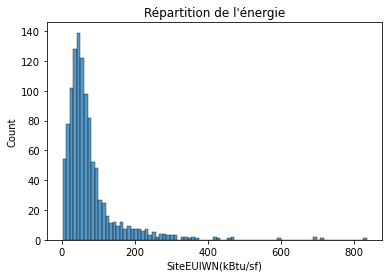

In [9]:
sns.histplot(df['SiteEUIWN(kBtu/sf)'])
plt.title('Répartition de l\'énergie');

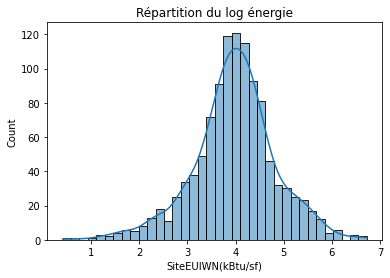

In [10]:
sns.histplot(np.log(df['SiteEUIWN(kBtu/sf)']),kde=True)
plt.title('Répartition du log énergie');

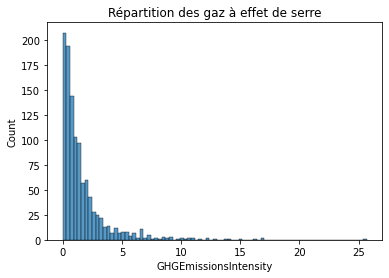

In [11]:
sns.histplot(df['GHGEmissionsIntensity'])
plt.title('Répartition des gaz à effet de serre');

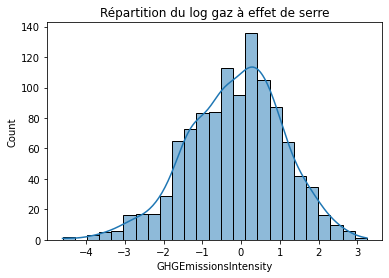

In [12]:
sns.histplot(np.log(df['GHGEmissionsIntensity']),kde=True)
plt.title('Répartition du log gaz à effet de serre');

In [13]:
df['SiteEUIWN(kBtu/sf)'] = np.log(df['SiteEUIWN(kBtu/sf)'])
df['GHGEmissionsIntensity'] = np.log(df['GHGEmissionsIntensity'])

In [14]:
df.isnull().sum()

BuildingType                       0
PrimaryPropertyType                0
Neighborhood                       0
Latitude                           0
Longitude                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEUIWN(kBtu/sf)                 0
SteamUse(kBtu)                     0
NaturalGas(kBtu)                   0
GHGEmissionsIntensity              1
AgeRangeBuilt                      0
ParkingGFARate                     0
BuildingGFARate                    0
GFAPerFloor                        0
dtype: int64

In [15]:
df.drop(df[df['GHGEmissionsIntensity'].isna()].index,inplace=True)

In [16]:
df.isnull().sum()

BuildingType                       0
PrimaryPropertyType                0
Neighborhood                       0
Latitude                           0
Longitude                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEUIWN(kBtu/sf)                 0
SteamUse(kBtu)                     0
NaturalGas(kBtu)                   0
GHGEmissionsIntensity              0
AgeRangeBuilt                      0
ParkingGFARate                     0
BuildingGFARate                    0
GFAPerFloor                        0
dtype: int64

In [17]:
df.head()

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,AgeRangeBuilt,ParkingGFARate,BuildingGFARate,GFAPerFloor
0,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,12,88434,0,88434,88434.0,0.0,0.0,60.0,4.434382,2003882.00,1276453.0,1.040277,"(90, 100]",0.000000,1.000000,6802.615385
1,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,11,103566,15064,88502,83880.0,15064.0,4622.0,61.0,4.583947,0.00,5145082.0,1.050822,"(20, 30]",0.145453,0.854547,7375.166667
2,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,10,61320,0,61320,61320.0,0.0,0.0,56.0,4.730039,2214446.25,1811213.0,1.541159,"(90, 100]",0.000000,1.000000,5574.545455
3,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,18,175580,62000,113580,123445.0,68009.0,0.0,75.0,4.776599,0.00,8803998.0,1.057790,"(40, 50]",0.353115,0.646885,5977.894737
4,Nonresidential COS,Other,DOWNTOWN,47.61623,-122.33657,1.0,2,97288,37198,60090,88830.0,0.0,0.0,79.8,4.953006,0.00,4715182.0,1.131402,"(20, 30]",0.382349,0.617651,20030.000000


In [18]:
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[['BuildingType','Neighborhood','AgeRangeBuilt','PrimaryPropertyType']]).toarray()
ohe.get_feature_names()

array(['x0_Campus', 'x0_NonResidential', 'x0_Nonresidential COS',
       'x0_Nonresidential WA', 'x0_SPS-District K-12', 'x1_BALLARD',
       'x1_Ballard', 'x1_CENTRAL', 'x1_Central', 'x1_DELRIDGE',
       'x1_DOWNTOWN', 'x1_Delridge', 'x1_EAST', 'x1_GREATER DUWAMISH',
       'x1_LAKE UNION', 'x1_MAGNOLIA / QUEEN ANNE', 'x1_NORTH',
       'x1_NORTHEAST', 'x1_NORTHWEST', 'x1_North', 'x1_Northwest',
       'x1_SOUTHEAST', 'x1_SOUTHWEST', 'x2_(0, 10]', 'x2_(10, 20]',
       'x2_(100, 110]', 'x2_(110, 120]', 'x2_(120, 130]', 'x2_(20, 30]',
       'x2_(30, 40]', 'x2_(40, 50]', 'x2_(50, 60]', 'x2_(60, 70]',
       'x2_(70, 80]', 'x2_(80, 90]', 'x2_(90, 100]',
       'x3_Distribution Center', 'x3_Hospital', 'x3_Hotel',
       'x3_K-12 School', 'x3_Laboratory', 'x3_Large Office',
       'x3_Medical Office', 'x3_Mixed Use Property', 'x3_Other',
       'x3_Refrigerated Warehouse', 'x3_Residence Hall', 'x3_Restaurant',
       'x3_Retail Store', 'x3_Self-Storage Facility',
       'x3_Senior Care C

In [19]:
feature_labels = ['x0_Campus', 'x0_NonResidential', 'x0_Nonresidential COS',
       'x0_Nonresidential WA', 'x0_SPS-District K-12', 'x1_BALLARD',
       'x1_Ballard', 'x1_CENTRAL', 'x1_Central', 'x1_DELRIDGE',
       'x1_DOWNTOWN', 'x1_Delridge', 'x1_EAST', 'x1_GREATER DUWAMISH',
       'x1_LAKE UNION', 'x1_MAGNOLIA / QUEEN ANNE', 'x1_NORTH',
       'x1_NORTHEAST', 'x1_NORTHWEST', 'x1_North', 'x1_Northwest',
       'x1_SOUTHEAST', 'x1_SOUTHWEST', 'x2_(0, 10]', 'x2_(10, 20]',
       'x2_(100, 110]', 'x2_(110, 120]', 'x2_(120, 130]', 'x2_(20, 30]',
       'x2_(30, 40]', 'x2_(40, 50]', 'x2_(50, 60]', 'x2_(60, 70]',
       'x2_(70, 80]', 'x2_(80, 90]', 'x2_(90, 100]',
       'x3_Distribution Center', 'x3_Hospital', 'x3_Hotel',
       'x3_K-12 School', 'x3_Laboratory', 'x3_Large Office',
       'x3_Medical Office', 'x3_Mixed Use Property', 'x3_Other',
       'x3_Refrigerated Warehouse', 'x3_Residence Hall', 'x3_Restaurant',
       'x3_Retail Store', 'x3_Self-Storage Facility',
       'x3_Senior Care Community', 'x3_Small- and Mid-Sized Office',
       'x3_Supermarket / Grocery Store', 'x3_University', 'x3_Warehouse',
       'x3_Worship Facility']

In [20]:
features = pd.DataFrame(feature_array,columns = feature_labels)

In [21]:
data = pd.concat([df,features],axis=1)
data.head()

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,AgeRangeBuilt,ParkingGFARate,BuildingGFARate,GFAPerFloor,x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_BALLARD,x1_Ballard,x1_CENTRAL,x1_Central,x1_DELRIDGE,x1_DOWNTOWN,x1_Delridge,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_North,x1_Northwest,x1_SOUTHEAST,x1_SOUTHWEST,"x2_(0, 10]","x2_(10, 20]","x2_(100, 110]","x2_(110, 120]","x2_(120, 130]","x2_(20, 30]","x2_(30, 40]","x2_(40, 50]","x2_(50, 60]","x2_(60, 70]","x2_(70, 80]","x2_(80, 90]","x2_(90, 100]",x3_Distribution Center,x3_Hospital,x3_Hotel,x3_K-12 School,x3_Laboratory,x3_Large Office,x3_Medical Office,x3_Mixed Use Property,x3_Other,x3_Refrigerated Warehouse,x3_Residence Hall,x3_Restaurant,x3_Retail Store,x3_Self-Storage Facility,x3_Senior Care Community,x3_Small- and Mid-Sized Office,x3_Supermarket / Grocery Store,x3_University,x3_Warehouse,x3_Worship Facility
0,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,60.0,4.434382,2003882.00,1276453.0,1.040277,"(90, 100]",0.000000,1.000000,6802.615385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,61.0,4.583947,0.00,5145082.0,1.050822,"(20, 30]",0.145453,0.854547,7375.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,56.0,4.730039,2214446.25,1811213.0,1.541159,"(90, 100]",0.000000,1.000000,5574.545455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,75.0,4.776599,0.00,8803998.0,1.057790,"(40, 50]",0.353115,0.646885,5977.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Nonresidential COS,Other,DOWNTOWN,47.61623,-122.33657,1.0,2.0,97288.0,37198.0,60090.0,88830.0,0.0,0.0,79.8,4.953006,0.00,4715182.0,1.131402,"(20, 30]",0.382349,0.617651,20030.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#suppression des variables utilisées
data.drop(columns=['BuildingType','Neighborhood','AgeRangeBuilt','PrimaryPropertyType'],inplace=True)

In [23]:
data.head()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,ParkingGFARate,BuildingGFARate,GFAPerFloor,x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_BALLARD,x1_Ballard,x1_CENTRAL,x1_Central,x1_DELRIDGE,x1_DOWNTOWN,x1_Delridge,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_North,x1_Northwest,x1_SOUTHEAST,x1_SOUTHWEST,"x2_(0, 10]","x2_(10, 20]","x2_(100, 110]","x2_(110, 120]","x2_(120, 130]","x2_(20, 30]","x2_(30, 40]","x2_(40, 50]","x2_(50, 60]","x2_(60, 70]","x2_(70, 80]","x2_(80, 90]","x2_(90, 100]",x3_Distribution Center,x3_Hospital,x3_Hotel,x3_K-12 School,x3_Laboratory,x3_Large Office,x3_Medical Office,x3_Mixed Use Property,x3_Other,x3_Refrigerated Warehouse,x3_Residence Hall,x3_Restaurant,x3_Retail Store,x3_Self-Storage Facility,x3_Senior Care Community,x3_Small- and Mid-Sized Office,x3_Supermarket / Grocery Store,x3_University,x3_Warehouse,x3_Worship Facility
0,47.61220,-122.33799,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,60.0,4.434382,2003882.00,1276453.0,1.040277,0.000000,1.000000,6802.615385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.61317,-122.33393,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,61.0,4.583947,0.00,5145082.0,1.050822,0.145453,0.854547,7375.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.61412,-122.33664,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,56.0,4.730039,2214446.25,1811213.0,1.541159,0.000000,1.000000,5574.545455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.61375,-122.34047,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,75.0,4.776599,0.00,8803998.0,1.057790,0.353115,0.646885,5977.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.61623,-122.33657,1.0,2.0,97288.0,37198.0,60090.0,88830.0,0.0,0.0,79.8,4.953006,0.00,4715182.0,1.131402,0.382349,0.617651,20030.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
ss = StandardScaler()
data.columns

Index(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)',
       'GHGEmissionsIntensity', 'ParkingGFARate', 'BuildingGFARate',
       'GFAPerFloor', 'x0_Campus', 'x0_NonResidential',
       'x0_Nonresidential COS', 'x0_Nonresidential WA', 'x0_SPS-District K-12',
       'x1_BALLARD', 'x1_Ballard', 'x1_CENTRAL', 'x1_Central', 'x1_DELRIDGE',
       'x1_DOWNTOWN', 'x1_Delridge', 'x1_EAST', 'x1_GREATER DUWAMISH',
       'x1_LAKE UNION', 'x1_MAGNOLIA / QUEEN ANNE', 'x1_NORTH', 'x1_NORTHEAST',
       'x1_NORTHWEST', 'x1_North', 'x1_Northwest', 'x1_SOUTHEAST',
       'x1_SOUTHWEST', 'x2_(0, 10]', 'x2_(10, 20]', 'x2_(100, 110]',
       'x2_(110, 120]', 'x2_(120, 130]', 'x2_(20, 30]', 'x2_(30, 40]',
       'x2_(40,

In [25]:
numerical_columns = ['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)',
       'GHGEmissionsIntensity', 'ParkingGFARate', 'BuildingGFARate',
       'GFAPerFloor', 'x0_Campus', 'x0_NonResidential',
       'x0_Nonresidential COS', 'x0_Nonresidential WA', 'x0_SPS-District K-12',
       'x1_BALLARD', 'x1_Ballard', 'x1_CENTRAL', 'x1_Central', 'x1_DELRIDGE',
       'x1_DOWNTOWN', 'x1_Delridge', 'x1_EAST', 'x1_GREATER DUWAMISH',
       'x1_LAKE UNION', 'x1_MAGNOLIA / QUEEN ANNE', 'x1_NORTH', 'x1_NORTHEAST',
       'x1_NORTHWEST', 'x1_North', 'x1_Northwest', 'x1_SOUTHEAST',
       'x1_SOUTHWEST', 'x2_(0, 10]', 'x2_(10, 20]', 'x2_(100, 110]',
       'x2_(110, 120]', 'x2_(120, 130]', 'x2_(20, 30]', 'x2_(30, 40]',
       'x2_(40, 50]', 'x2_(50, 60]', 'x2_(60, 70]', 'x2_(70, 80]',
       'x2_(80, 90]', 'x2_(90, 100]', 'x3_Distribution Center', 'x3_Hospital',
       'x3_Hotel', 'x3_K-12 School', 'x3_Laboratory', 'x3_Large Office',
       'x3_Medical Office', 'x3_Mixed Use Property', 'x3_Other',
       'x3_Refrigerated Warehouse', 'x3_Residence Hall', 'x3_Restaurant',
       'x3_Retail Store', 'x3_Self-Storage Facility',
       'x3_Senior Care Community', 'x3_Small- and Mid-Sized Office',
       'x3_Supermarket / Grocery Store', 'x3_University', 'x3_Warehouse',
       'x3_Worship Facility']

In [26]:
data[numerical_columns] = ss.fit_transform(data[numerical_columns])
data.head()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,ParkingGFARate,BuildingGFARate,GFAPerFloor,x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_BALLARD,x1_Ballard,x1_CENTRAL,x1_Central,x1_DELRIDGE,x1_DOWNTOWN,x1_Delridge,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_North,x1_Northwest,x1_SOUTHEAST,x1_SOUTHWEST,"x2_(0, 10]","x2_(10, 20]","x2_(100, 110]","x2_(110, 120]","x2_(120, 130]","x2_(20, 30]","x2_(30, 40]","x2_(40, 50]","x2_(50, 60]","x2_(60, 70]","x2_(70, 80]","x2_(80, 90]","x2_(90, 100]",x3_Distribution Center,x3_Hospital,x3_Hotel,x3_K-12 School,x3_Laboratory,x3_Large Office,x3_Medical Office,x3_Mixed Use Property,x3_Other,x3_Refrigerated Warehouse,x3_Residence Hall,x3_Restaurant,x3_Retail Store,x3_Self-Storage Facility,x3_Senior Care Community,x3_Small- and Mid-Sized Office,x3_Supermarket / Grocery Store,x3_University,x3_Warehouse,x3_Worship Facility
0,-0.078502,-0.177848,-0.117648,2.458712,0.445834,-0.258357,0.645761,0.644239,-0.488577,-0.260372,-0.056251,0.538480,3.870904,-0.035666,0.977701,-0.375267,0.375267,-0.762617,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,2.927280,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
1,-0.059164,-0.012695,-0.117648,2.190145,0.685955,0.360832,0.647038,0.564812,0.476321,0.802367,-0.015086,0.715234,-0.148197,0.647870,0.986340,0.745913,-0.745913,-0.709218,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,3.178050,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,-0.341614,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
2,-0.040224,-0.122932,-0.117648,1.921579,0.015578,-0.258357,0.136495,0.171341,-0.488577,-0.260372,-0.220912,0.887885,4.293224,0.058819,1.388065,-0.375267,0.375267,-0.877153,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,2.927280,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
3,-0.047601,-0.278729,-0.117648,4.070109,1.828702,2.290081,1.118063,1.254870,3.867620,-0.260372,0.561224,0.942909,-0.148197,1.294354,0.992049,2.346612,-2.346612,-0.839535,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,2.782114,-0.389169,-0.398326,-0.255459,-0.157895,-0.341614,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-

In [27]:
data.isnull().sum()

Latitude                           1
Longitude                          1
NumberofBuildings                  1
NumberofFloors                     1
PropertyGFATotal                   1
PropertyGFAParking                 1
PropertyGFABuilding(s)             1
LargestPropertyUseTypeGFA          1
SecondLargestPropertyUseTypeGFA    1
ThirdLargestPropertyUseTypeGFA     1
ENERGYSTARScore                    1
SiteEUIWN(kBtu/sf)                 1
SteamUse(kBtu)                     1
NaturalGas(kBtu)                   1
GHGEmissionsIntensity              1
ParkingGFARate                     1
BuildingGFARate                    1
GFAPerFloor                        1
x0_Campus                          1
x0_NonResidential                  1
x0_Nonresidential COS              1
x0_Nonresidential WA               1
x0_SPS-District K-12               1
x1_BALLARD                         1
x1_Ballard                         1
x1_CENTRAL                         1
x1_Central                         1
x

In [28]:
data.drop(data[data['NumberofBuildings'].isna()].index,inplace=True)
data.drop(data[data['x1_BALLARD'].isna()].index,inplace=True)

In [29]:
data.isnull().sum()

Latitude                           0
Longitude                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEUIWN(kBtu/sf)                 0
SteamUse(kBtu)                     0
NaturalGas(kBtu)                   0
GHGEmissionsIntensity              0
ParkingGFARate                     0
BuildingGFARate                    0
GFAPerFloor                        0
x0_Campus                          0
x0_NonResidential                  0
x0_Nonresidential COS              0
x0_Nonresidential WA               0
x0_SPS-District K-12               0
x1_BALLARD                         0
x1_Ballard                         0
x1_CENTRAL                         0
x1_Central                         0
x

In [30]:
data_energy = data.copy()
data_energy.drop(columns=['GHGEmissionsIntensity'],inplace=True)
data_energy.head()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),ParkingGFARate,BuildingGFARate,GFAPerFloor,x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_BALLARD,x1_Ballard,x1_CENTRAL,x1_Central,x1_DELRIDGE,x1_DOWNTOWN,x1_Delridge,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_North,x1_Northwest,x1_SOUTHEAST,x1_SOUTHWEST,"x2_(0, 10]","x2_(10, 20]","x2_(100, 110]","x2_(110, 120]","x2_(120, 130]","x2_(20, 30]","x2_(30, 40]","x2_(40, 50]","x2_(50, 60]","x2_(60, 70]","x2_(70, 80]","x2_(80, 90]","x2_(90, 100]",x3_Distribution Center,x3_Hospital,x3_Hotel,x3_K-12 School,x3_Laboratory,x3_Large Office,x3_Medical Office,x3_Mixed Use Property,x3_Other,x3_Refrigerated Warehouse,x3_Residence Hall,x3_Restaurant,x3_Retail Store,x3_Self-Storage Facility,x3_Senior Care Community,x3_Small- and Mid-Sized Office,x3_Supermarket / Grocery Store,x3_University,x3_Warehouse,x3_Worship Facility
0,-0.078502,-0.177848,-0.117648,2.458712,0.445834,-0.258357,0.645761,0.644239,-0.488577,-0.260372,-0.056251,0.538480,3.870904,-0.035666,-0.375267,0.375267,-0.762617,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,2.927280,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
1,-0.059164,-0.012695,-0.117648,2.190145,0.685955,0.360832,0.647038,0.564812,0.476321,0.802367,-0.015086,0.715234,-0.148197,0.647870,0.745913,-0.745913,-0.709218,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,3.178050,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,-0.341614,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
2,-0.040224,-0.122932,-0.117648,1.921579,0.015578,-0.258357,0.136495,0.171341,-0.488577,-0.260372,-0.220912,0.887885,4.293224,0.058819,-0.375267,0.375267,-0.877153,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,2.927280,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
3,-0.047601,-0.278729,-0.117648,4.070109,1.828702,2.290081,1.118063,1.254870,3.867620,-0.260372,0.561224,0.942909,-0.148197,1.294354,2.346612,-2.346612,-0.839535,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,2.782114,-0.389169,-0.398326,-0.255459,-0.157895,-0.341614,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-

In [31]:
data_energy_without_energyscore = data_energy.copy()
data_energy_without_energyscore.drop(columns=['ENERGYSTARScore'],inplace=True)
data_energy_without_energyscore.head()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEUIWN(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),ParkingGFARate,BuildingGFARate,GFAPerFloor,x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_BALLARD,x1_Ballard,x1_CENTRAL,x1_Central,x1_DELRIDGE,x1_DOWNTOWN,x1_Delridge,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_North,x1_Northwest,x1_SOUTHEAST,x1_SOUTHWEST,"x2_(0, 10]","x2_(10, 20]","x2_(100, 110]","x2_(110, 120]","x2_(120, 130]","x2_(20, 30]","x2_(30, 40]","x2_(40, 50]","x2_(50, 60]","x2_(60, 70]","x2_(70, 80]","x2_(80, 90]","x2_(90, 100]",x3_Distribution Center,x3_Hospital,x3_Hotel,x3_K-12 School,x3_Laboratory,x3_Large Office,x3_Medical Office,x3_Mixed Use Property,x3_Other,x3_Refrigerated Warehouse,x3_Residence Hall,x3_Restaurant,x3_Retail Store,x3_Self-Storage Facility,x3_Senior Care Community,x3_Small- and Mid-Sized Office,x3_Supermarket / Grocery Store,x3_University,x3_Warehouse,x3_Worship Facility
0,-0.078502,-0.177848,-0.117648,2.458712,0.445834,-0.258357,0.645761,0.644239,-0.488577,-0.260372,0.538480,3.870904,-0.035666,-0.375267,0.375267,-0.762617,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,2.927280,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
1,-0.059164,-0.012695,-0.117648,2.190145,0.685955,0.360832,0.647038,0.564812,0.476321,0.802367,0.715234,-0.148197,0.647870,0.745913,-0.745913,-0.709218,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,3.178050,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,-0.341614,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
2,-0.040224,-0.122932,-0.117648,1.921579,0.015578,-0.258357,0.136495,0.171341,-0.488577,-0.260372,0.887885,4.293224,0.058819,-0.375267,0.375267,-0.877153,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,2.927280,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
3,-0.047601,-0.278729,-0.117648,4.070109,1.828702,2.290081,1.118063,1.254870,3.867620,-0.260372,0.942909,-0.148197,1.294354,2.346612,-2.346612,-0.839535,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,2.782114,-0.389169,-0.398326,-0.255459,-0.157895,-0.341614,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
4,0.001841,-0.120085,-0.11

## Dataframe : 'data_energy'

In [32]:
data_energy.head()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),ParkingGFARate,BuildingGFARate,GFAPerFloor,x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_BALLARD,x1_Ballard,x1_CENTRAL,x1_Central,x1_DELRIDGE,x1_DOWNTOWN,x1_Delridge,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_North,x1_Northwest,x1_SOUTHEAST,x1_SOUTHWEST,"x2_(0, 10]","x2_(10, 20]","x2_(100, 110]","x2_(110, 120]","x2_(120, 130]","x2_(20, 30]","x2_(30, 40]","x2_(40, 50]","x2_(50, 60]","x2_(60, 70]","x2_(70, 80]","x2_(80, 90]","x2_(90, 100]",x3_Distribution Center,x3_Hospital,x3_Hotel,x3_K-12 School,x3_Laboratory,x3_Large Office,x3_Medical Office,x3_Mixed Use Property,x3_Other,x3_Refrigerated Warehouse,x3_Residence Hall,x3_Restaurant,x3_Retail Store,x3_Self-Storage Facility,x3_Senior Care Community,x3_Small- and Mid-Sized Office,x3_Supermarket / Grocery Store,x3_University,x3_Warehouse,x3_Worship Facility
0,-0.078502,-0.177848,-0.117648,2.458712,0.445834,-0.258357,0.645761,0.644239,-0.488577,-0.260372,-0.056251,0.538480,3.870904,-0.035666,-0.375267,0.375267,-0.762617,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,2.927280,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
1,-0.059164,-0.012695,-0.117648,2.190145,0.685955,0.360832,0.647038,0.564812,0.476321,0.802367,-0.015086,0.715234,-0.148197,0.647870,0.745913,-0.745913,-0.709218,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,3.178050,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,-0.341614,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
2,-0.040224,-0.122932,-0.117648,1.921579,0.015578,-0.258357,0.136495,0.171341,-0.488577,-0.260372,-0.220912,0.887885,4.293224,0.058819,-0.375267,0.375267,-0.877153,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,-0.359439,-0.389169,-0.398326,-0.255459,-0.157895,2.927280,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-0.128388,-0.417855,-0.239046
3,-0.047601,-0.278729,-0.117648,4.070109,1.828702,2.290081,1.118063,1.254870,3.867620,-0.260372,0.561224,0.942909,-0.148197,1.294354,2.346612,-2.346612,-0.839535,-0.117041,0.278693,-0.234804,-0.030029,-0.073721,-0.214902,-0.060138,-0.185695,-0.052058,-0.1695,2.221673,-0.052058,-0.26141,-0.579431,-0.300621,-0.33666,-0.190826,-0.286132,-0.2453,-0.079664,-0.052058,-0.145462,-0.142199,-0.128388,-0.259437,-0.26141,-0.28797,-0.180439,-0.314658,-0.305935,2.782114,-0.389169,-0.398326,-0.255459,-0.157895,-0.341614,-0.207926,-0.042486,4.510671,-0.183083,-0.073721,-0.214902,-0.120935,-0.239046,-0.453003,-0.100045,-0.120935,-0.100045,-0.253452,-0.154872,-0.113021,-0.518239,-0.1695,-

In [33]:
y_energy = data_energy['SiteEUIWN(kBtu/sf)']
X_energy = data_energy.drop('SiteEUIWN(kBtu/sf)',axis=1)

X_train_energy, X_test_energy,y_train_energy, y_test_energy = train_test_split(X_energy, y_energy, test_size=0.2,random_state=0)

In [34]:
#on garde 80% de données pour l'entraînement
X_train_energy.shape

(887, 72)

In [35]:
#20% de données pour le test
X_test_energy.shape

(222, 72)

In [36]:
#modèles linéaires

#paramètres pour SGDRegressor
params_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.01, 1, 10, 100],
    'penalty': ['l2','l1','elasticnet', None],
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling']
}

#paramètres pour Elasticnet (L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge)
params_elasticnet = {
     'tol' : [0.1,0.01,0.001,0.0001],
     'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  
     'l1_ratio': np.arange(0.0, 1.0, 0.1)
                    }


#modèles non-linéaires

#paramètres RandomForestRegressor
params_random_forest = {
    'max_features' : ['sqrt','log2'],
    'max_depth' : [5, 15, 25 ,50],
    'min_samples_split' : [2, 5, 10],
    'bootstrap' : [True, False],
    'min_samples_leaf' : [1, 2, 5, 10]
}

#paramètres AdaBoostRegressor
param_grid_adaboost = [{
    "n_estimators": [50, 100], 
    "learning_rate": [0.001,0.01,0.1,1,10],
    "loss": ['linear', 'square', 'exponential']
}]


In [37]:
table_data_energy = pd.DataFrame(columns=['model','test_score(R2)','RMSE','MAE','median'])

In [38]:
table_data_energy

,model,test_score(R2),RMSE,MAE,median


In [39]:
def estimation(params,model,X_train,X_test,y_train,y_test,X,y):
    grid =GridSearchCV(estimator = model(random_state=0),
                 param_grid = params,
                 return_train_score = True,
                 scoring='r2',
                 cv=5)
    
    grid.fit(X_train,y_train)

    model_estimator = grid.best_estimator_
    
    y_pred = grid.best_estimator_.predict(X)
    
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [ i for i in res.columns if 'split' not in i]
    res = res[cols]
    res = res.sort_values('rank_test_score')
    display(res.head())
    
    print("Best params : " , grid.best_params_)
    best_params = grid.best_params_
    estimator = model(**best_params,random_state=0)
    estimator.fit(X_train,y_train)
    
    tr_score = estimator.score(X_train,y_train)
    te_score = estimator.score(X_test,y_test)
    print(f"score train : {tr_score} score test : {te_score}")
    
    print("RMSE : " + str(mean_squared_error(y,y_pred)))
    print("MAE : " + str(mean_absolute_error(y,y_pred)))
    print('median abs err ' + str(median_absolute_error(y,y_pred)))
    
    rmse = mean_squared_error(y,y_pred)
    mae = mean_absolute_error(y,y_pred)
    median = median_absolute_error(y,y_pred)
    
    err_hist = np.abs(y - y_pred)
    plt.hist(err_hist,bins=50)
    plt.title('Erreurs entre valeurs réelles et valeurs prédites')
    plt.show()
    
    N,train_score, val_score =learning_curve(model_estimator, X_train, y_train, train_sizes = np.linspace(0.2,1.0,5),cv=5)

    plt.plot(N,train_score.mean(axis=1),label='train')
    plt.plot(N,val_score.mean(axis=1),label='validation')
    plt.xlabel('train_sizes')
    plt.legend()
    plt.show()
    
    
    return te_score, rmse, mae, median


In [40]:
def estimation_importances(params,model,X_train,X_test,y_train,y_test,X,y):
    grid =GridSearchCV(estimator = model(random_state=0),
                 param_grid = params,
                 return_train_score = True,
                 scoring='r2',
                 cv=5)
    
    grid.fit(X_train,y_train)
    
    model_estimator = grid.best_estimator_
    
    y_pred = grid.best_estimator_.predict(X)
    
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [ i for i in res.columns if 'split' not in i]
    res = res[cols]
    res = res.sort_values('rank_test_score')
    display(res.head())
    
    print("Best params : " , grid.best_params_)
    best_params = grid.best_params_
    estimator = model(**best_params,random_state=0)
    estimator.fit(X_train,y_train)
    
    tr_score = estimator.score(X_train,y_train)
    te_score = estimator.score(X_test,y_test)
    print(f"score train - R2 : {tr_score} score test : {te_score}")
    
    print("RMSE : " + str(mean_squared_error(y,y_pred)))
    print("MAE : " + str(mean_absolute_error(y,y_pred)))
    print('median abs err ' + str(median_absolute_error(y,y_pred)))
    
    rmse = mean_squared_error(y,y_pred)
    mae = mean_absolute_error(y,y_pred)
    median = median_absolute_error(y,y_pred)
    
    err_hist = np.abs(y - y_pred)
    plt.hist(err_hist,bins=50)
    plt.title('Erreurs entre valeurs réelles et valeurs prédites')
    plt.show()
    
    N,train_score, val_score =learning_curve(model_estimator, X_train, y_train, train_sizes = np.linspace(0.2,1.0,5),cv=5)

    plt.plot(N,train_score.mean(axis=1),label='train')
    plt.plot(N,val_score.mean(axis=1),label='validation')
    plt.xlabel('train_sizes')
    plt.legend()
    plt.show()
    
    importances = pd.DataFrame({'Features':X_test.columns,'Importances':model_estimator.feature_importances_})
    display(importances.sort_values(by='Importances',ascending=False).head(10))
    
    explainer = shap.Explainer(grid.best_estimator_.predict, X_train)
    shap_values = explainer(X_train)
    shap.plots.beeswarm(shap_values)
    
    return te_score, rmse, mae, median

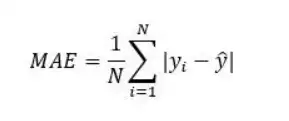

In [41]:
from IPython.display import Image
Image(filename='D:\pierr\Documents\images\mae.png',width=200,height=100)

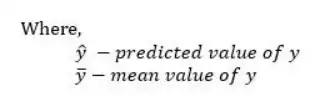

In [42]:
Image(filename='D:\pierr\Documents\images\y.png',width=200,height=100)

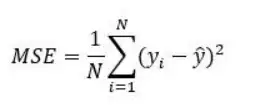

In [43]:
Image(filename='D:\pierr\Documents\images\mse.png',width=200,height=100)

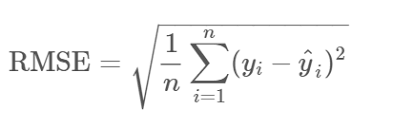

In [44]:
Image(filename='D:\pierr\Documents\images\index.png',width=200,height=100)

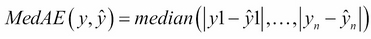

In [45]:
Image(filename='D:\pierr\Documents\images\median.png',width=200,height=200)

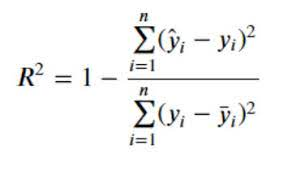

In [46]:
Image(filename='D:\pierr\Documents\images\index.jpg',width=200,height=100)

In [47]:
#estimation(params_sgd,SGDRegressor,X_train_energy,X_test_energy,y_train_energy,y_test_energy,X_energy,y_energy)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,param_penalty,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
114,0.007222,0.003722,0.002410,0.002948,0.01,constant,huber,elasticnet,"{'alpha': 0.01, 'learning_rate': 'constant', '...",0.471038,0.082259,1,0.535700,0.012793
78,0.006727,0.004055,0.000000,0.000000,0.01,constant,huber,elasticnet,"{'alpha': 0.01, 'learning_rate': 'constant', '...",0.471038,0.082259,1,0.535700,0.012793
76,0.004013,0.004915,0.001605,0.003210,0.01,constant,huber,l2,"{'alpha': 0.01, 'learning_rate': 'constant', '...",0.468517,0.078523,3,0.551864,0.013464
112,0.004015,0.004917,0.003208,0.003928,0.01,constant,huber,l2,"{'alpha': 0.01, 'learning_rate': 'constant', '...",0.468517,0.078523,3,0.551864,0.013464
40,0.003201,0.001600,0.001600,0.001959,0.001,constant,huber,l2,"{'alpha': 0.001, 'learning_rate': 'constant', ...",0.468412,0.099304,5,0.564112,0.013719


Best params :  {'alpha': 0.01, 'learning_rate': 'constant', 'loss': 'huber', 'penalty': 'elasticnet'}
score train : 0.5214007513357399 score test : 0.3026606553114102
RMSE : 0.5239603046940248
MAE : 0.48043379957927895
median abs err 0.32264337545070587


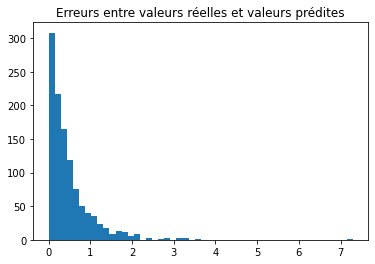

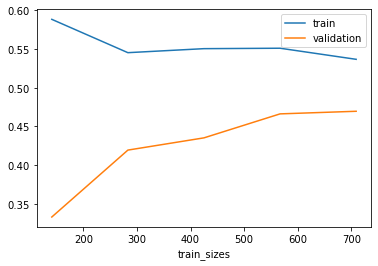

In [48]:
te_score_sgd, rmse_sgd, mae_sgd, median_sgd = estimation(params_sgd,SGDRegressor,X_train_energy,X_test_energy,y_train_energy,y_test_energy,X_energy,y_energy)

In [49]:
table_data_energy.loc[0]=['SGDRegressor',te_score_sgd,rmse_sgd,mae_sgd,median_sgd]

In [50]:
table_data_energy

,model,test_score(R2),RMSE,MAE,median
0,SGDRegressor,0.302661,0.52396,0.480434,0.322643


In [51]:
#estimation(params_elasticnet,ElasticNet,X_train_energy,X_test_energy,y_train_energy,y_test_energy,X_energy,y_energy)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_tol,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
121,0.034117,0.004210,0.002006,0.003104,0.1,0.0,0.01,"{'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.01}",0.475074,0.078067,1,0.583290,0.011714
122,0.032637,0.002944,0.000403,0.000805,0.1,0.0,0.001,"{'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.001}",0.475074,0.078067,1,0.583290,0.011714
123,0.031710,0.003201,0.003613,0.003677,0.1,0.0,0.0001,"{'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.0001}",0.475074,0.078067,1,0.583290,0.011714
120,0.030497,0.000810,0.003206,0.003927,0.1,0.0,0.1,"{'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.1}",0.475074,0.078067,1,0.583290,0.011714
125,0.002007,0.003107,0.002008,0.003109,0.1,0.1,0.01,"{'alpha': 0.1, 'l1_ratio': 0.1, 'tol': 0.01}",0.474432,0.088128,5,0.569584,0.011878


Best params :  {'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.1}
score train : 0.5752755979310091 score test : 0.4172857290690569
RMSE : 0.4575389235762688
MAE : 0.4741696105169472
median abs err 0.34447206927543483


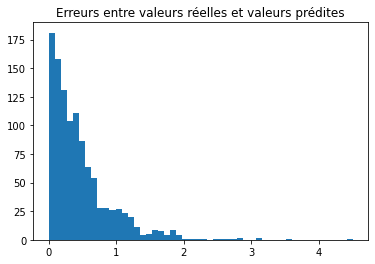

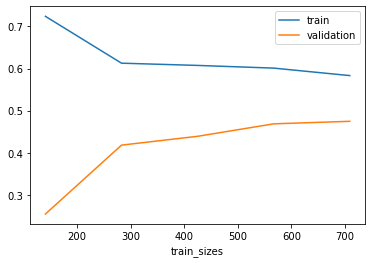

In [52]:
te_score_elastic, rmse_elastic, mae_elastic, median_elastic = estimation(params_elasticnet,ElasticNet,X_train_energy,X_test_energy,y_train_energy,y_test_energy,X_energy,y_energy)

In [53]:
table_data_energy.loc[1]=['ElasticNet',te_score_elastic,rmse_elastic,mae_elastic,median_elastic]
table_data_energy

,model,test_score(R2),RMSE,MAE,median
0,SGDRegressor,0.302661,0.523960,0.480434,0.322643
1,ElasticNet,0.417286,0.457539,0.474170,0.344472


In [54]:
#estimation_importances(params_random_forest,RandomForestRegressor,X_train_energy,X_test_energy,y_train_energy,y_test_energy,X_energy,y_energy)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
145,0.193540,0.010129,0.013397,0.002725,False,25,sqrt,1,"{'bootstrap': False, 'max_depth': 25, 'max_fea...",0.624621,0.044667,1,0.976467,0.001251
144,0.241024,0.016610,0.011412,0.006087,False,25,sqrt,1,"{'bootstrap': False, 'max_depth': 25, 'max_fea...",0.624375,0.039235,2,0.999762,0.000058
169,0.183151,0.000901,0.010108,0.000039,False,50,sqrt,1,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",0.624291,0.035095,3,0.977599,0.001517
168,0.226451,0.003964,0.010915,0.001010,False,50,sqrt,1,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",0.619123,0.040183,4,1.000000,0.000000
146,0.162607,0.000666,0.010114,0.000037,False,25,sqrt,1,"{'bootstrap': False, 'max_depth': 25, 'max_fea...",0.613244,0.043742,5,0.924272,0.002213


Best params :  {'bootstrap': False, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
score train - R2 : 0.9762618622901666 score test : 0.6565428002822489
RMSE : 0.08959935959691803
MAE : 0.1659777919019679
median abs err 0.08371769076900293


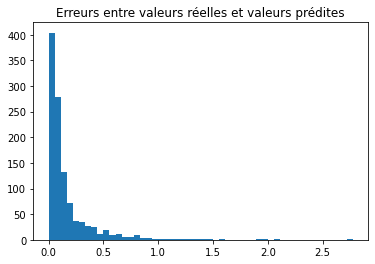

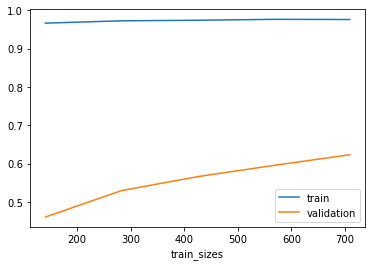

,Features,Importances
12,NaturalGas(kBtu),0.258847
10,ENERGYSTARScore,0.096748
70,x3_Warehouse,0.078854
7,LargestPropertyUseTypeGFA,0.040175
15,GFAPerFloor,0.040116
4,PropertyGFATotal,0.038995
65,x3_Self-Storage Facility,0.037351
6,PropertyGFABuilding(s),0.036349
1,Longitude,0.035663
0,Latitude,0.034804


Permutation explainer: 888it [02:30,  5.57it/s]                         


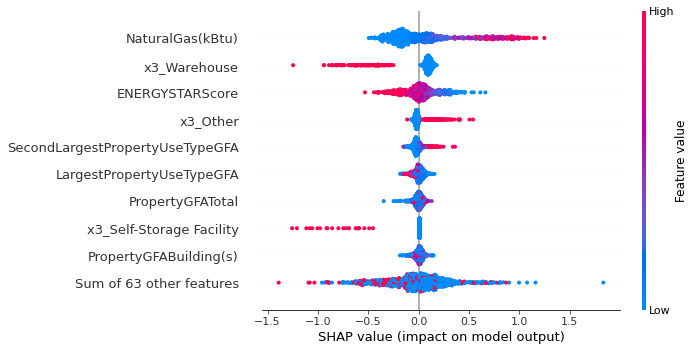

In [55]:
te_score_forest, rmse_forest, mae_forest, median_forest = estimation_importances(params_random_forest,RandomForestRegressor,X_train_energy,X_test_energy,y_train_energy,y_test_energy,X_energy,y_energy)

In [56]:
table_data_energy.loc[2]=['RandomForestRegressor',te_score_forest,rmse_forest,mae_forest,median_forest]
table_data_energy

,model,test_score(R2),RMSE,MAE,median
0,SGDRegressor,0.302661,0.523960,0.480434,0.322643
1,ElasticNet,0.417286,0.457539,0.474170,0.344472
2,RandomForestRegressor,0.656543,0.089599,0.165978,0.083718


In [57]:
#estimation_importances(param_grid_adaboost,AdaBoostRegressor,X_train_energy,X_test_energy,y_train_energy,y_test_energy,X_energy,y_energy)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
17,0.324859,0.019277,0.009752,0.005954,0.1,exponential,100,"{'learning_rate': 0.1, 'loss': 'exponential', ...",0.520011,0.032643,1,0.580057,0.008849
13,0.287784,0.005206,0.011249,0.002201,0.1,linear,100,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.518043,0.028655,2,0.585733,0.008762
12,0.149332,0.003819,0.005668,0.003887,0.1,linear,50,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.510562,0.033215,3,0.558620,0.008672
14,0.141710,0.000385,0.010107,0.000048,0.1,square,50,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",0.504737,0.030973,4,0.572620,0.009733
16,0.170868,0.008024,0.005948,0.005935,0.1,exponential,50,"{'learning_rate': 0.1, 'loss': 'exponential', ...",0.504129,0.037700,5,0.549971,0.008006


Best params :  {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
score train - R2 : 0.5752140675009882 score test : 0.51712371433956
RMSE : 0.4370263087414007
MAE : 0.49182729721817153
median abs err 0.37944616674758996


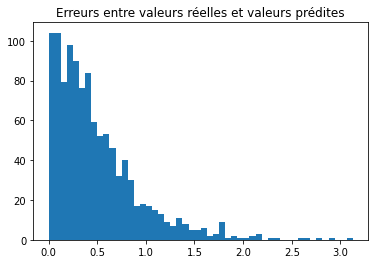

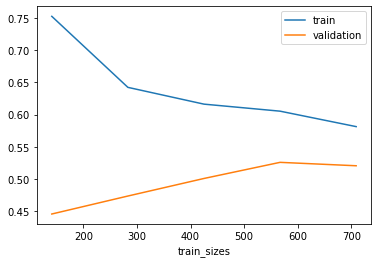

,Features,Importances
12,NaturalGas(kBtu),0.434283
70,x3_Warehouse,0.109449
65,x3_Self-Storage Facility,0.101310
10,ENERGYSTARScore,0.081322
60,x3_Other,0.054929
3,NumberofFloors,0.031040
52,x3_Distribution Center,0.024499
7,LargestPropertyUseTypeGFA,0.020962
6,PropertyGFABuilding(s),0.019048
4,PropertyGFATotal,0.016339


Permutation explainer: 888it [04:26,  3.19it/s]                         


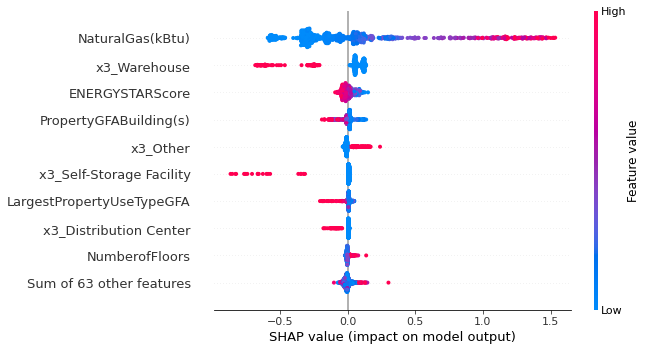

In [58]:
te_score_adaboost,rmse_adaboost,mae_adaboost,median_adaboost= estimation_importances(param_grid_adaboost,AdaBoostRegressor,X_train_energy,X_test_energy,y_train_energy,y_test_energy,X_energy,y_energy)

In [59]:
table_data_energy.loc[3]=['AdaBoostRegressor',te_score_adaboost,rmse_adaboost,mae_adaboost,median_adaboost]
table_data_energy

,model,test_score(R2),RMSE,MAE,median
0,SGDRegressor,0.302661,0.523960,0.480434,0.322643
1,ElasticNet,0.417286,0.457539,0.474170,0.344472
2,RandomForestRegressor,0.656543,0.089599,0.165978,0.083718
3,AdaBoostRegressor,0.517124,0.437026,0.491827,0.379446


## Dataframe : 'data_energy_without_energyscore'

In [41]:
y_energy_without_energyscore = data_energy_without_energyscore['SiteEUIWN(kBtu/sf)']
X_energy_without_energyscore = data_energy_without_energyscore.drop('SiteEUIWN(kBtu/sf)',axis=1)

X_train_energy_without_energyscore, X_test_energy_without_energyscore,y_train_energy_without_energyscore, y_test_energy_without_energyscore = train_test_split(X_energy_without_energyscore, y_energy_without_energyscore, test_size=0.2,random_state=0)

In [42]:
table_data_energy_without_energyscore = pd.DataFrame(columns=['model','test_score (R2)','RMSE','MAE','median'])
table_data_energy_without_energyscore 

,model,test_score (R2),RMSE,MAE,median


In [43]:
#estimation(params_sgd,SGDRegressor,X_train_energy_without_energyscore,X_test_energy_without_energyscore,y_train_energy_without_energyscore,y_test_energy_without_energyscore,X_energy_without_energyscore,y_energy_without_energyscore)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,param_penalty,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
41,0.008077,0.002930,0.003211,0.002987,0.001,constant,huber,l1,"{'alpha': 0.001, 'learning_rate': 'constant', ...",0.383099,0.102807,1,0.477520,0.019899
6,0.006441,0.000915,0.002015,0.001829,0.0001,constant,huber,elasticnet,"{'alpha': 0.0001, 'learning_rate': 'constant',...",0.382928,0.106673,2,0.489710,0.020070
42,0.007975,0.002801,0.001609,0.002192,0.001,constant,huber,elasticnet,"{'alpha': 0.001, 'learning_rate': 'constant', ...",0.382734,0.095998,3,0.486910,0.018802
112,0.004825,0.000987,0.000804,0.001609,0.01,constant,huber,l2,"{'alpha': 0.01, 'learning_rate': 'constant', '...",0.381715,0.072328,4,0.470851,0.019102
76,0.002214,0.001958,0.004424,0.003018,0.01,constant,huber,l2,"{'alpha': 0.01, 'learning_rate': 'constant', '...",0.381715,0.072328,4,0.470851,0.019102


Best params :  {'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'huber', 'penalty': 'l1'}
score train : 0.46171060145028087 score test : 0.026945029207563254
RMSE : 0.628179528799325
MAE : 0.536166656296107
median abs err 0.3767044806387857


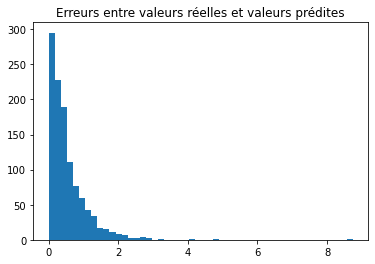

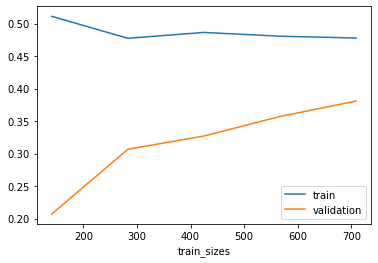

In [44]:
te_score_sgd_energy_without, rmse_sgd_energy_without, mae_sgd_energy_without, median_sgd_energy_without = estimation(params_sgd,SGDRegressor,X_train_energy_without_energyscore,X_test_energy_without_energyscore,y_train_energy_without_energyscore,y_test_energy_without_energyscore,X_energy_without_energyscore,y_energy_without_energyscore)

In [45]:
table_data_energy_without_energyscore.loc[0]=['SGDRegressor',te_score_sgd_energy_without,rmse_sgd_energy_without,mae_sgd_energy_without,median_sgd_energy_without]
table_data_energy_without_energyscore

,model,test_score (R2),RMSE,MAE,median
0,SGDRegressor,0.026945,0.62818,0.536167,0.376704


In [46]:
#estimation(params_elasticnet,ElasticNet,X_train_energy_without_energyscore,X_test_energy_without_energyscore,y_train_energy_without_energyscore,y_test_energy_without_energyscore,X_energy_without_energyscore,y_energy_without_energyscore)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_tol,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
120,0.042852,0.003125,0.002412,0.001595,0.1,0.0,0.1,"{'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.1}",0.390173,0.085138,1,0.511701,0.013994
121,0.039880,0.000740,0.003015,0.001824,0.1,0.0,0.01,"{'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.01}",0.390173,0.085138,1,0.511701,0.013994
122,0.037145,0.003508,0.002015,0.003120,0.1,0.0,0.001,"{'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.001}",0.390173,0.085138,1,0.511701,0.013994
123,0.042872,0.003594,0.004062,0.002604,0.1,0.0,0.0001,"{'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.0001}",0.390173,0.085138,1,0.511701,0.013994
125,0.003231,0.002505,0.002227,0.001180,0.1,0.1,0.01,"{'alpha': 0.1, 'l1_ratio': 0.1, 'tol': 0.01}",0.388884,0.093960,5,0.498021,0.014308


Best params :  {'alpha': 0.1, 'l1_ratio': 0.0, 'tol': 0.1}
score train : 0.5026222272190701 score test : 0.28806148825739
RMSE : 0.5418903289931467
MAE : 0.5354575916849212
median abs err 0.3897177851514579


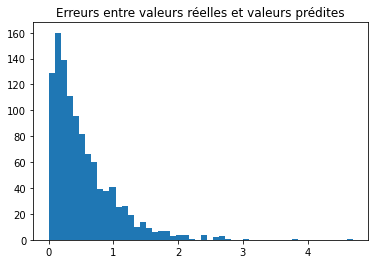

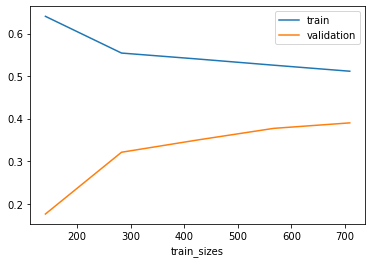

In [47]:
te_score_elastic_energy_without,rmse_elastic_energy_without,mae_elastic_energy_without,median_elastic_energy_without = estimation(params_elasticnet,ElasticNet,X_train_energy_without_energyscore,X_test_energy_without_energyscore,y_train_energy_without_energyscore,y_test_energy_without_energyscore,X_energy_without_energyscore,y_energy_without_energyscore)

In [48]:
table_data_energy_without_energyscore.loc[1]=['ElasticNet',te_score_elastic_energy_without,rmse_elastic_energy_without,mae_elastic_energy_without,median_elastic_energy_without]
table_data_energy_without_energyscore

,model,test_score (R2),RMSE,MAE,median
0,SGDRegressor,0.026945,0.62818,0.536167,0.376704
1,ElasticNet,0.288061,0.54189,0.535458,0.389718


In [49]:
#estimation_importances(params_random_forest,RandomForestRegressor,X_train_energy_without_energyscore,X_test_energy_without_energyscore,y_train_energy_without_energyscore,y_test_energy_without_energyscore,X_energy_without_energyscore,y_energy_without_energyscore)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
169,0.259203,0.008233,0.014714,0.004531,False,50,sqrt,1,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",0.577080,0.057310,1,0.971967,0.002119
168,0.339101,0.035280,0.016736,0.002627,False,50,sqrt,1,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",0.575656,0.059535,2,1.000000,0.000000
144,0.300181,0.008420,0.011998,0.004026,False,25,sqrt,1,"{'bootstrap': False, 'max_depth': 25, 'max_fea...",0.575295,0.052181,3,0.999030,0.000117
170,0.236557,0.011297,0.011932,0.003827,False,50,sqrt,1,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",0.572888,0.050293,4,0.910830,0.003041
145,0.255382,0.008808,0.016664,0.003974,False,25,sqrt,1,"{'bootstrap': False, 'max_depth': 25, 'max_fea...",0.570298,0.059303,5,0.968998,0.002782


Best params :  {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
score train - R2 : 0.9724329165618578 score test : 0.5902840860532114
RMSE : 0.10628813567962597
MAE : 0.18157555928834332
median abs err 0.08569202002737164


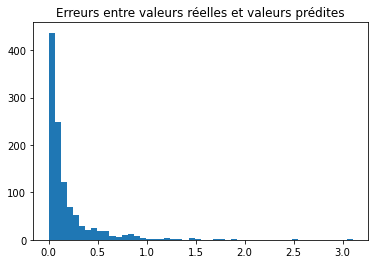

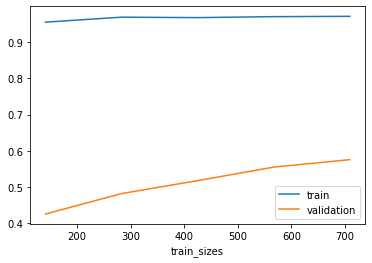

,Features,Importances
11,NaturalGas(kBtu),0.284592
69,x3_Warehouse,0.070538
1,Longitude,0.045938
14,GFAPerFloor,0.045762
6,PropertyGFABuilding(s),0.045358
4,PropertyGFATotal,0.045186
7,LargestPropertyUseTypeGFA,0.044689
0,Latitude,0.042987
64,x3_Self-Storage Facility,0.035241
67,x3_Supermarket / Grocery Store,0.032368


Permutation explainer: 888it [04:17,  3.35it/s]                         


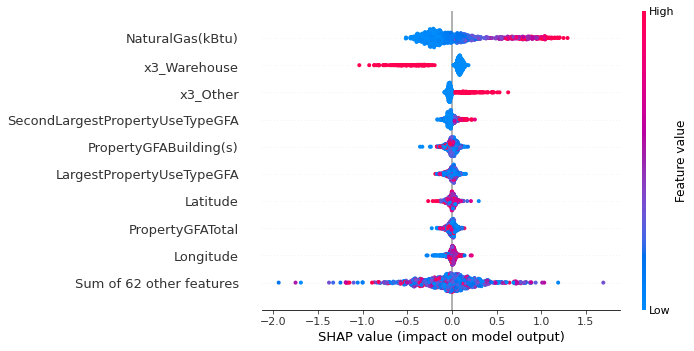

In [50]:
te_score_forest_energy_without,rmse_forest_energy_without,mae_forest_energy_without,median_forest_energy_without = estimation_importances(params_random_forest,RandomForestRegressor,X_train_energy_without_energyscore,X_test_energy_without_energyscore,y_train_energy_without_energyscore,y_test_energy_without_energyscore,X_energy_without_energyscore,y_energy_without_energyscore)

In [51]:
table_data_energy_without_energyscore.loc[2]=['RandomForestRegressor',te_score_forest_energy_without,rmse_forest_energy_without,mae_forest_energy_without,median_forest_energy_without]
table_data_energy_without_energyscore

,model,test_score (R2),RMSE,MAE,median
0,SGDRegressor,0.026945,0.628180,0.536167,0.376704
1,ElasticNet,0.288061,0.541890,0.535458,0.389718
2,RandomForestRegressor,0.590284,0.106288,0.181576,0.085692


In [52]:
#estimation_importances(param_grid_adaboost,AdaBoostRegressor,X_train_energy_without_energyscore,X_test_energy_without_energyscore,y_train_energy_without_energyscore,y_test_energy_without_energyscore,X_energy_without_energyscore,y_energy_without_energyscore)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
17,0.409159,0.024434,0.018899,0.002076,0.1,exponential,100,"{'learning_rate': 0.1, 'loss': 'exponential', ...",0.513057,0.040354,1,0.572968,0.006104
16,0.225170,0.023502,0.010129,0.003802,0.1,exponential,50,"{'learning_rate': 0.1, 'loss': 'exponential', ...",0.509371,0.036733,2,0.547905,0.008086
12,0.224891,0.017950,0.008829,0.003641,0.1,linear,50,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.509214,0.036124,3,0.550719,0.010033
13,0.406043,0.026618,0.018104,0.002464,0.1,linear,100,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",0.509155,0.038629,4,0.572452,0.006674
14,0.203972,0.017363,0.008823,0.004892,0.1,square,50,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",0.493687,0.037465,5,0.566767,0.011877


Best params :  {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
score train - R2 : 0.5750720841953885 score test : 0.4928683128067839
RMSE : 0.44213451408655485
MAE : 0.4970566052825572
median abs err 0.37662064845038534


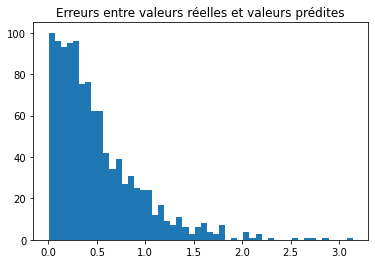

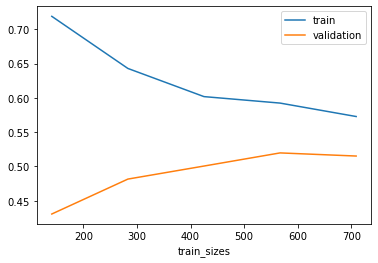

,Features,Importances
11,NaturalGas(kBtu),0.444165
69,x3_Warehouse,0.110667
64,x3_Self-Storage Facility,0.098376
3,NumberofFloors,0.065996
59,x3_Other,0.063394
6,PropertyGFABuilding(s),0.024628
0,Latitude,0.024575
51,x3_Distribution Center,0.020934
5,PropertyGFAParking,0.018222
7,LargestPropertyUseTypeGFA,0.017868


Permutation explainer: 888it [06:58,  2.07it/s]                         


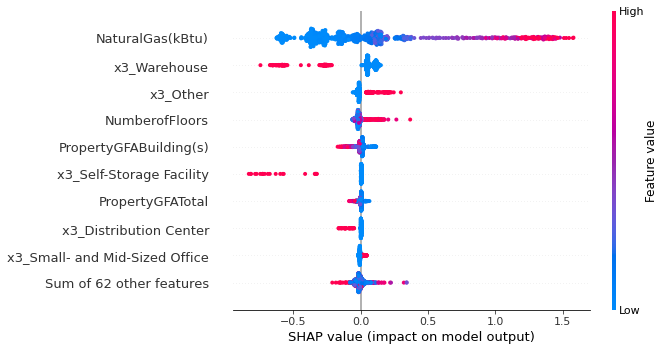

In [53]:
te_score_ada_energy_without,rmse_ada_energy_without,mae_ada_energy_without,median_ada_energy_without = estimation_importances(param_grid_adaboost,AdaBoostRegressor,X_train_energy_without_energyscore,X_test_energy_without_energyscore,y_train_energy_without_energyscore,y_test_energy_without_energyscore,X_energy_without_energyscore,y_energy_without_energyscore)

In [54]:
table_data_energy_without_energyscore.loc[3]=['AdaBoostRegressor',te_score_ada_energy_without,rmse_ada_energy_without,mae_ada_energy_without,median_ada_energy_without]
table_data_energy_without_energyscore

,model,test_score (R2),RMSE,MAE,median
0,SGDRegressor,0.026945,0.628180,0.536167,0.376704
1,ElasticNet,0.288061,0.541890,0.535458,0.389718
2,RandomForestRegressor,0.590284,0.106288,0.181576,0.085692
3,AdaBoostRegressor,0.492868,0.442135,0.497057,0.376621


## Conclusion